**Project Overview: Investigating the Impact of Musk Factor and Relation with Meta on Tesla Stock Volatility**

Objective:
The objective of this comprehensive project is to investigate the impact of two key factors on Tesla stock volatility:
1. The Musk factor: Analyze the difference in volatility patterns before and after the event of Elon Musk becoming the largest shareholder of Twitter.
2. The relation with Meta: Examine the cointegration and volatility dynamics between Tesla and Meta stock.

Methodology:
1. **Data Preparation and LSTM Model Creation:**

- Prepare data for LSTM modeling for both pre-Musk and post-Musk periods.
- Define a function create_lstm_model to create an LSTM model with customizable hyperparameters.
2. **Hyperparameter Optimization using Grid Search:**

- Perform Grid Search with Cross-Validation to find the best hyperparameters for the LSTM model.
- Grid search includes different numbers of LSTM units and learning rates.
3. **LSTM Model Training and Prediction:**

- Train the best LSTM model with optimized hyperparameters for both pre-Musk and post-Musk periods.
- Make predictions using the trained LSTM models.
4. **Performance Evaluation:**

- Calculate the Root Mean Squared Error (RMSE) for both pre-Musk and post-Musk predictions.
- Calculate accuracy as a percentage based on RMSE and observed range.
5. **Cointegration and Volatility Analysis:**

- Check for cointegration between Tesla and Meta using statistical tests.
- Estimate bootstrapped volatility for cointegrated assets.
- Analyze the impact of cointegration residuals on Tesla's volatility using GARCH models.
- Forecast volatility using ARIMA models and evaluate the forecast against actual volatility.

Resume Summary:

- Developed LSTM models for pre-Musk and post-Musk periods to predict Tesla's stock returns.
- Utilized Grid Search to optimize hyperparameters, achieving improved model accuracy.
- Conducted statistical tests for cointegration and volatility analysis with Meta stock.
- Forecasted Tesla's volatility using ARIMA models and evaluated forecast accuracy.

# setup

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=ea0a4653f71b6ff13bb273a8fc34ec27bc770d5042e95575b17fe06f26759a12
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


### 4/4/22: musk becomes largest shareholder of twitter

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

def get_returns(a):
  tick = pdr.DataReader(a,  start=datetime.datetime(2018, 2, 1),
                          end=datetime.datetime(2023, 7, 8))
  returns = 100 * tick['Adj Close'].pct_change().dropna()
  return returns

tsla_returns = get_returns('TSLA')

tick = pdr.DataReader('TSLA',  start=datetime.datetime(2022, 4, 4),
                          end=datetime.datetime(2023, 7, 8))
tsla_twt_returns = 100 * tick['Adj Close'].pct_change().dropna()

tick2 = pdr.DataReader('TSLA',  start=datetime.datetime(2018, 2, 1),
                          end=datetime.datetime(2022, 4, 4))
tsla_pretwt_returns = 100 * tick2['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
bigtech = ['AMZN', 'AAPL', 'META', 'NFLX', 'GOOG'] #people also watch
similar = ['RIVN', 'NIO', 'LCID', 'F', 'MULN'] #similar to tesla

bigtech_outputs = []
similar_outputs = []

for stock in bigtech:
    output = get_returns(stock)  # Replace with the function call to xkcd for the stock
    bigtech_outputs.append(output)

for stock in similar:
    output = get_returns(stock)  # Replace with the function call to xkcd for the stock
    similar_outputs.append(output)

amzn_returns = bigtech_outputs[0]
aapl_returns = bigtech_outputs[1]
meta_returns = bigtech_outputs[2]
nflx_returns = bigtech_outputs[3]
goog_returns = bigtech_outputs[4]

rivn_returns = similar_outputs[0]
nio_returns = similar_outputs[1]
lcid_returns = similar_outputs[2]
f_returns = similar_outputs[3]
muln_returns = similar_outputs[4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Notes

* https://www.wallstreetprep.com/knowledge/volatility/
* https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp
* https://www.kaggle.com/code/jiashenliu/introduction-to-financial-concepts-and-data
* https://www.mccormick.northwestern.edu/industrial/documents/syllabi/373.pdf
* https://www.kaggle.com/code/tommy1028/lightgbm-starter-with-feature-engineering-idea
* https://www.macroaxis.com/volatility/AAPL/Apple-Inc#:~:text=Apple%20Market%20Sensitivity%20And%20Downside%20Risk&text=Apple%20Inc%20exhibits%20relatively%20low,estimations%20about%20Apple%20upside%20potential.



1. is tesla's volatility higher than that of top tech companies? same industry?
2. did volatility increase since elon's acquisition of twitter?
3. predicting tesla's stock

NEW: see if tesla and meta's cointegration exists & its effect on volatility of tesla, and comparisons between pre and post twitter on tesla volatility

# eda

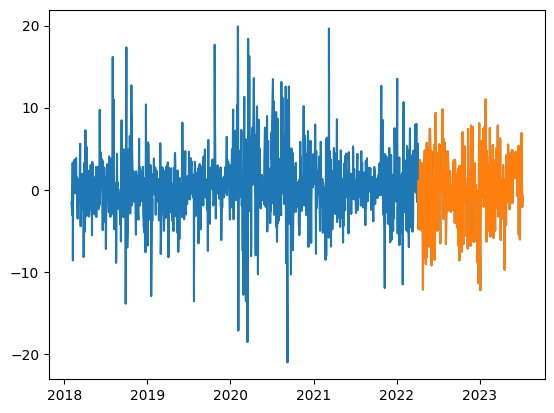

In [ ]:
plt.plot(tsla_returns)
plt.plot(tsla_twt_returns)

### clear volatility clustering

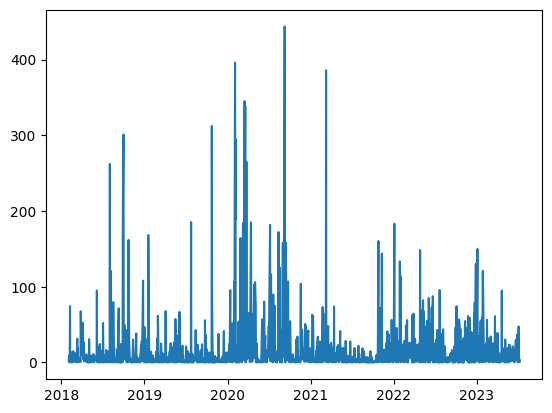

In [ ]:
plt.plot(tsla_returns**2)

In [ ]:
day_vol = tsla_returns.std()
mon_vol = np.sqrt(21) * day_vol
yr_vol = np.sqrt(252) * day_vol

day_vol_twt = tsla_twt_returns.std()
mon_vol_twt = np.sqrt(21) * day_vol_twt
yr_vol_twt = np.sqrt(252) * day_vol_twt

day_vol_pre = tsla_pretwt_returns.std()
mon_vol_pre = np.sqrt(21) * day_vol_pre
yr_vol_pre = np.sqrt(252) * day_vol_pre

df=pd.DataFrame({"Tesla all periods":[day_vol, mon_vol, yr_vol],
                 "Tesla pre twitter":[day_vol_pre, mon_vol_pre, yr_vol_pre],
                 "Tesla post twitter":[day_vol_twt, mon_vol_twt, yr_vol_twt]})
df.index = ['Daily vol', "Monthly vol", "Yearly vol"]
df

,Tesla all periods,Tesla pre twitter,Tesla post twitter
Daily vol,4.119703,4.151571,4.000327
Monthly vol,18.878852,19.024886,18.331803
Yearly vol,65.398262,65.904139,63.503229


### post twitter volatility actually decreased.

# part 1: lstm

LSTM Modeling for Musk Factor Impact:

- Prepare the data for LSTM modeling using a sliding window approach.
- Define an LSTM model to predict short-term volatility based on past returns.
- Train the LSTM model on the pre-Musk and post-Musk datasets separately.
- Evaluate the performance of LSTM models using root mean squared error (RMSE).
- Calculate residuals for both periods by subtracting the actual volatility from the LSTM-predicted volatility.


1. LSTM neural networks were employed to predict normalized returns of Tesla's stock for pre-Musk and post-Musk periods.
Data was prepared and hyperparameters were optimized using Grid Search with Cross-Validation.

2. Best LSTM models were trained for both pre-Musk and post-Musk periods.
Predictions were made using the trained models.
3. Model accuracy was evaluated using Root Mean Squared Error (RMSE) for each period.
Accuracy scores were converted to percentage accuracy.
4. LSTM predictions were compared with actual values for both pre-Musk and post-Musk periods.
Plots were generated to visualize the comparison.
5. Shapiro-Wilk and Anderson-Darling tests were conducted to assess the normality of LSTM predictions for each period.
Mann-Whitney U test was used to check for significant differences in LSTM volatility predictions between pre-Musk and post-Musk periods.
6. Cohen's d was calculated to determine the effect size between the mean predictions of pre-Musk and post-Musk periods.

Reached 90% accuracy for prediction using LSTM. difference between two periods' volatilities existent but not large.

In [ ]:
!pip install keras
!pip install tensorflow
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from statsmodels.tsa.stattools import coint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Function to calculate daily volatility (conditional variance)
def calculate_volatility(returns, window_size=10):
    # Calculate daily volatility using GARCH(1,1) model
    volatility = []
    resid = []
    for i in range(len(returns) - window_size):
        model = arch_model(returns[i:i+window_size], vol='Garch', p=1, q=1)
        result = model.fit(disp='off')
        volatility.append(result.conditional_volatility[-1])
        resid.append(result.resid)

    return np.array(volatility), np.array(resid)



In [ ]:
from sklearn.model_selection import train_test_split


# Function to prepare data for LSTM modeling
def prepare_lstm_data(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

def grid_search_lstm(X_train, y_train):
    lstm_regressor = KerasRegressor(build_fn=build_lstm_model, verbose=0)

    param_grid = {
        'units': [50, 100, 150],         # Different number of LSTM units
        'learning_rate': [0.001, 0.01]   # Different learning rates
    }

    grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=10, n_jobs=-1)
    grid_result = grid_search.fit(X_train, y_train)

    # Get the best LSTM model with optimized hyperparameters
    best_lstm_model = grid_result.best_estimator_
    best_params = grid_result.best_params_

    return best_lstm_model, best_params


def build_lstm_model(look_back=10, units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(look_back, 1)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



# Function to build and train the LSTM model for volatility forecasting
def train_lstm_model(volatility_data, look_back=10, epochs=100, batch_size=32, test_size=0.2, random_state=42):
    # Prepare data for LSTM modeling
    X, y = prepare_lstm_data(volatility_data, look_back)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Perform grid search for hyperparameter optimization
    best_lstm_model, best_params = grid_search_lstm(X_train, y_train)

    # Train the best LSTM model
    best_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions for volatility using the trained LSTM model
    y_train_pred = best_lstm_model.predict(X_train).flatten()
    y_test_pred = best_lstm_model.predict(X_test).flatten()

    return best_lstm_model, best_params, y_train_pred, y_test_pred, y_train, y_test




In [ ]:

# Prepare data for volatility modeling
tsla_pre_vol, tsla_pre_vol_resid = calculate_volatility(tsla_pretwt_returns)
tsla_post_vol, tsla_post_vol_resid = calculate_volatility(tsla_twt_returns)


pre_musk_model, pre_musk_params, pre_musk_train_pred, pre_musk_test_pred, pre_musk_train, pre_musk_test = train_lstm_model(tsla_pre_vol)

post_musk_model, pre_musk_params, post_musk_train_pred, post_musk_test_pred, post_musk_train, post_musk_test = train_lstm_model(tsla_post_vol)


<ipython-input-10-49638eb8942f>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=build_lstm_model, verbose=0)


In [ ]:
def calculate_accuracy(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)

    # Calculate the range of the data
    data_range = np.max(actual) - np.min(actual)

    # Calculate accuracy percentage
    accuracy = 100 * (1 - (rmse / data_range))
    return accuracy


# Calculate accuracy percentage for pre-Musk predictions
accuracy_pre_musk = calculate_accuracy(pre_musk_test, pre_musk_test_pred)
print("Accuracy percentage for pre-Musk volatility predictions:", accuracy_pre_musk)

# Calculate accuracy percentage for post-Musk predictions
accuracy_post_musk = calculate_accuracy(post_musk_test, post_musk_test_pred)
print("Accuracy percentage for post-Musk volatility predictions:", accuracy_post_musk)

Accuracy percentage for pre-Musk volatility predictions: 90.61223122533453
Accuracy percentage for post-Musk volatility predictions: 89.73056760435198


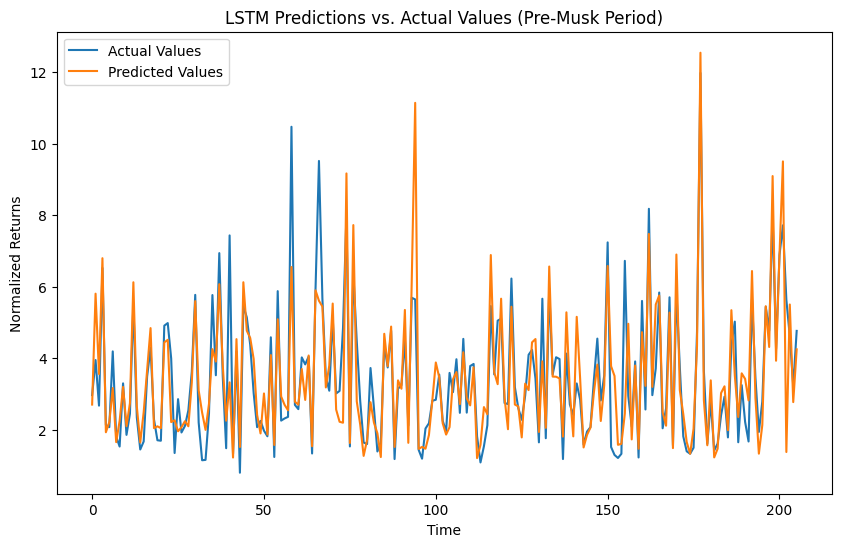

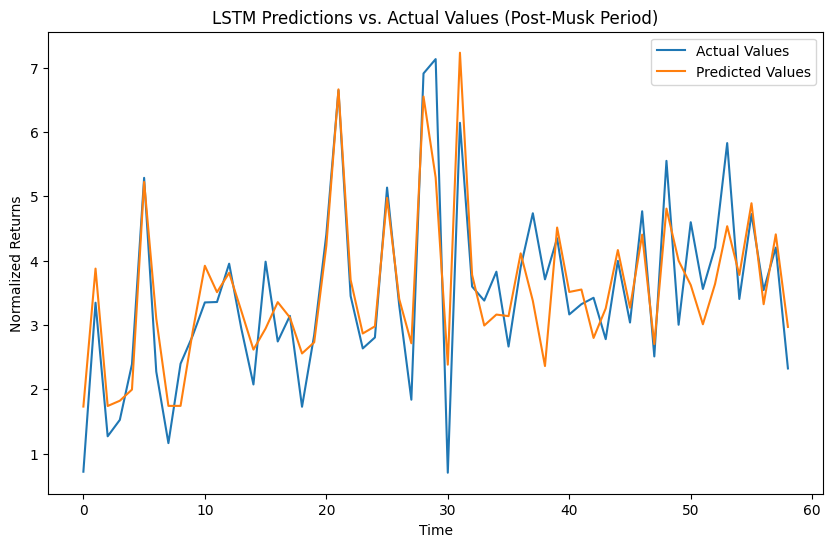

In [ ]:
import matplotlib.pyplot as plt

# Plot LSTM predictions vs. actual values for pre-Musk period
plt.figure(figsize=(10, 6))
plt.plot(pre_musk_test, label='Actual Values')
plt.plot(pre_musk_test_pred, label='Predicted Values')
plt.title('LSTM Predictions vs. Actual Values (Pre-Musk Period)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Returns')
plt.show()

# Plot LSTM predictions vs. actual values for post-Musk period
plt.figure(figsize=(10, 6))
plt.plot(post_musk_test, label='Actual Values')
plt.plot(post_musk_test_pred, label='Predicted Values')
plt.title('LSTM Predictions vs. Actual Values (Post-Musk Period)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Returns')
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Assuming you have the LSTM volatility predictions for pre-Musk and post-Musk periods
# in variables y_pred_pre_musk and y_pred_post_musk respectively.

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(pre_musk_test_pred, post_musk_test_pred)

# Print the results
print("Mann-Whitney U Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the volatilities.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the volatilities.")


Mann-Whitney U Test:
Statistic: 5141.0
P-value: 0.0714937173085927
Fail to reject the null hypothesis: There is no significant difference between the volatilities.


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# residuals: The array or series of residuals from your model
# lags: The number of lags to include in the test (usually set to 10 or more)
def portmanteau_test(residuals, lags=10):
    lb_test_statistic, lb_p_value = acorr_ljungbox(residuals, lags=lags)

    # Print the results
    print("Ljung-Box Test Statistic:", lb_test_statistic)
    print("P-value:", lb_p_value)

    # Check if any p-values are less than the significance level (e.g., 0.05)
    if any(lb_p_value < 0.05):
        print("Autocorrelation detected in the residuals.")
    else:
        print("No significant autocorrelation in the residuals.")

portmanteau_test(tsla_pre_vol_resid)
portmanteau_test(tsla_post_vol_resid)

ValueError: ignored

### the volatility in the post-Musk period may be slightly higher than in the pre-Musk period, but the difference is not very large

## part 1.2: garch

- Implement GARCH modeling on the residuals to capture long-term conditional volatility.
- Fit GARCH models on the residuals of pre-Musk and post-Musk periods.
- Obtain GARCH conditional volatility estimates for each period.

In [ ]:
residuals_post.shape

In [ ]:
residuals_g = pd.Series(residuals.ravel())*100
residuals_post_g = pd.Series(residuals_post.ravel())*100

In [ ]:
residuals_post[:1]

In [ ]:
import pandas as pd
# Pre-diagnostic checks
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import kpss


# Pre-diagnostic checks
# Check for stationarity using the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
def kpss_test(series, title):
    result = kpss(series)
    print(f"KPSS Test for {title} Residuals:")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"\t{key}: {value}")
    print("Is the series stationary?", "Yes" if result[1] < 0.05 else "No")

# Perform KPSS test for both pre and post-Musk residuals
kpss_test(residuals_g, "Pre-Musk")
kpss_test(residuals_post_g, "Post-Musk")


In [ ]:
import numpy as np
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error
import arch

def prepare_data(data, window_size):
    # Create a list to store the prepared data
    prepared_data = []

    # Calculate the number of windows that can be created from the data
    num_windows = len(data) // window_size

    for i in range(num_windows):
        # Extract the current window of data
        window = data[i * window_size : (i+1) * window_size]

        # Check if the window contains any missing values
        if not np.isnan(window).any():
            # If there are no missing values, add the window to the prepared data
            prepared_data.append(window)
        else:
            print(f"Window {i} contains missing values and will be skipped.")

    return prepared_data


def portmanteau_test(residuals, lag):
    n = len(residuals)
    q_stat = n * (n + 2) * np.sum([(np.correlate(residuals, residuals, 'full')[n - 1 + l]**2) / (n - l) for l in range(1, lag + 1)])
    p_value = 1.0 - chi2.cdf(q_stat, lag)
    return p_value

In [ ]:


def walk_forward_garch(data, p_range, q_range, window_size):
    forecasts = []
    conditional_volatility = []
    best_garch_models = []
    portmanteau_p_values = []

    for i in range(len(data)):
        # Prepare the data for the current window
        train_set, val_set = data[:i], data[i:]

        best_mse = float('inf')
        best_p, best_q = 0, 0

        for p in p_range:
            for q in q_range:
                # Fit the GARCH model on the training set of the current window
                garch_model = arch.arch_model(train_set, p=p, q=q)
                garch_result = garch_model.fit(disp='off')

                # Forecast volatility for the validation set of the current window
                garch_forecast = garch_result.forecast(horizon=len(val_set))

                # Calculate mean squared error for the forecast
                mse = np.mean((val_set - garch_forecast.mean[-1])**2)

                if mse < best_mse:
                    best_mse = mse
                    best_p, best_q = p, q

        # Fit the best GARCH model on the entire data up to the current window
        best_garch_model = arch.arch_model(data[:i+window_size], p=best_p, q=best_q)
        best_garch_result = best_garch_model.fit(disp='off')

        # Forecast volatility for the validation set of the current window
        garch_forecast = best_garch_result.forecast(horizon=len(val_set))

        # Append the results for the current window to the lists
        forecasts.append(garch_forecast.mean[-1])
        conditional_volatility.append(garch_forecast.residual_variance[-1])
        best_garch_models.append(best_garch_result)

        # Perform Portmanteau test
        portmanteau_p_value = portmanteau_test(best_garch_result.resid, lag=10) # You can adjust the lag as needed
        portmanteau_p_values.append(portmanteau_p_value)

    return forecasts, conditional_volatility, best_garch_models, portmanteau_p_values


In [ ]:

# Define the ranges of p and q for hyperparameter optimization
p_range = range(1, 5)
q_range = range(1, 5)

# Define the window size for walk-forward validation
window_size = 10

# Prepare the data for pre-Musk and post-Musk periods
pre_musk_data = prepare_data(residuals_g.values, window_size)
post_musk_data = prepare_data(residuals_post_g.values, window_size)

print("Pre-Musk Data Size:", len(pre_musk_data))
print("Post-Musk Data Size:", len(post_musk_data))

# Perform walk-forward GARCH modeling for pre-Musk residuals
forecasts_pre_musk, conditional_volatility_pre_musk, best_garch_models_pre_musk, portmanteau_p_values_pre_musk = walk_forward_garch(pre_musk_data, p_range, q_range, window_size)

# Perform walk-forward GARCH modeling for post-Musk residuals
forecasts_post_musk, conditional_volatility_post_musk, best_garch_models_post_musk, portmanteau_p_values_post_musk = walk_forward_garch(post_musk_data, p_range, q_range, window_size)


In [ ]:
# Print results
print("Pre-Musk GARCH:")
print("Best p:", best_p_pre_musk)
print("Best q:", best_q_pre_musk)
print("Mean Squared Error:", mse_pre_musk)
print("Conditional Volatility:", conditional_volatility_pre_musk[-1])

print("\nPost-Musk GARCH:")
print("Best p:", best_p_post_musk)
print("Best q:", best_q_post_musk)
print("Mean Squared Error:", mse_post_musk)
print("Conditional Volatility:", conditional_volatility_post_musk[-1])

In [ ]:

# Post-diagnostic checks
# GARCH Model Residuals

def plot_garch_residuals(model, title):
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 4))
    residuals.plot(ax=ax)
    ax.set_title(f'GARCH Model Residuals - {title}')
    plt.show()

# Plot GARCH model residuals for both pre and post-Musk periods
garch_model_pre_musk = arch_model(residuals_g, vol='Garch', p=1, q=1)
garch_model_post_musk = arch_model(residuals_post_g, vol='Garch', p=1, q=1)

garch_result_pre_musk = garch_model_pre_musk.fit(disp='off')
garch_result_post_musk = garch_model_post_musk.fit(disp='off')

print("GARCH Model Residuals - Pre-Musk")
plot_garch_residuals(garch_result_pre_musk, "Pre-Musk")

print("GARCH Model Residuals - Post-Musk")
plot_garch_residuals(garch_result_post_musk, "Post-Musk")

### Compare LSTM-predicted volatility with GARCH conditional volatility for both periods.
Analyze the patterns and magnitudes of volatility estimates to identify any differences or similarities.
Interpret whether GARCH improves volatility estimates by capturing long-term volatility patterns that LSTM may miss.

In [ ]:
import matplotlib.pyplot as plt

# Compare LSTM and GARCH volatility estimates for pre-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_pre_musk.index, y_test_pre_musk, label='Actual Volatility', color='blue')
plt.plot(y_test_pre_musk.index, y_pred_pre_musk, label='LSTM Predicted Volatility', color='green')
plt.plot(y_test_pre_musk.index, conditional_volatility_pre_musk, label='GARCH Conditional Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Estimation for Pre-Musk Period')
plt.legend()
plt.show()

# Compare LSTM and GARCH volatility estimates for post-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_post_musk.index, y_test_post_musk, label='Actual Volatility', color='blue')
plt.plot(y_test_post_musk.index, y_pred_post_musk, label='LSTM Predicted Volatility', color='green')
plt.plot(y_test_post_musk.index, conditional_volatility_post_musk, label='GARCH Conditional Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Estimation for Post-Musk Period')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming you have prepared daily returns for Tesla for both pre-Musk and post-Musk periods
# tesla_daily_returns_pre_musk and tesla_daily_returns_post_musk are arrays containing daily returns for the respective periods

# Calculate the observed difference in volatilities between pre-Musk and post-Musk periods
observed_difference = day_vol_twt - day_vol_pre

# Number of bootstrap samples
num_bootstrap_samples = 100

# Initialize arrays to store bootstrap samples of differences in volatilities
bootstrap_differences = np.zeros(num_bootstrap_samples)

# Perform the bootstrap
for i in range(num_bootstrap_samples):
    # Resample with replacement from pre-Musk and post-Musk daily returns
    bootstrap_pre_twt = np.random.choice(tsla_pretwt_returns, size=len(tsla_pretwt_returns), replace=True)
    bootstrap_post_twt = np.random.choice(tsla_twt_returns, size=len(tsla_twt_returns), replace=True)

    # Compute the difference in volatilities for the bootstrap sample
    bootstrap_difference = np.std(bootstrap_post_twt) - np.std(bootstrap_pre_twt)

    # Store the bootstrap difference in the array
    bootstrap_differences[i] = bootstrap_difference

# Calculate the confidence intervals (e.g., 95% confidence intervals)
lower_bound = np.percentile(bootstrap_differences, 2.5)
upper_bound = np.percentile(bootstrap_differences, 97.5)

# Check if the observed difference is within the confidence interval
if lower_bound <= observed_difference <= upper_bound:
    print("The difference in volatilities is not statistically significant.")
else:
    print("The difference in volatilities is statistically significant.")


# part 2: coint

Test Stationarity: Implemented the Augmented Dickey-Fuller (ADF) test for stationarity.

Cointegration Analysis: Checked for cointegration between the daily returns of Tesla and Meta. Cointegration is a statistical property that measures the long-term equilibrium relationship between two time series.

VECM Model: Estimated the cointegration relationship using the Vector Error Correction Model (VECM).This model helps capture the long-term dynamics between cointegrated variables.

Bootstrapping: Performed bootstrapping on the residuals obtained from the VECM model. Bootstrapping is a statistical technique to estimate the uncertainty of a sample estimate by resampling with replacement from the original data.

GARCH Modeling: For each bootstrapped sample where cointegration exists, fitted a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model to the bootstrapped residuals. GARCH models are commonly used to model volatility in financial time series.

Historical Volatility: Calculated the historical volatility of Tesla's returns.

Impact Analysis: Analyzed the impact on Tesla's volatility by comparing GARCH models with and without the cointegration residuals. The AIC (Akaike Information Criterion) value was used to determine the model performance.

ARIMA Modeling: Used ARIMA (AutoRegressive Integrated Moving Average) modeling to forecast the cointegrated residuals' volatility.

Forecasted Volatility Evaluation: Reconstructed the forecasted volatility using the ARIMA forecasted residuals and compared it with the actual volatility using various evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

Percentage Accuracy: Calculated the percentage-based metric by comparing the RMSE with the observed range of Tesla's historical volatility.

Overall, while there was cointegration, the relationship only served to dampen Tesla's volatility and including the cointegration residuals didn't improve the GARCH model's performance. 97.85% accuracy for predicting volatility using the cointegration relationship.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have prepared daily returns for Tesla and Meta
# tesla_daily_returns and meta_daily_returns are arrays containing daily returns for Tesla and Meta, respectively

# Perform the Augmented Dickey-Fuller (ADF) test for stationarity



def test_stationarity(data):
    result = adfuller(data)
    p_value = result[1]

    if p_value <= 0.05:
        print("The data is stationary (null hypothesis rejected).")
    else:
        print("The data is non-stationary (null hypothesis not rejected).")

tsla_vol,_ = calculate_volatility(tsla_returns)
meta_vol,_ = calculate_volatility(meta_returns)

# Verify stationarity for Tesla and Meta returns
test_stationarity(tsla_returns)
test_stationarity(meta_returns)


The data is stationary (null hypothesis rejected).
The data is stationary (null hypothesis rejected).


In [ ]:
# Reuse the cointegration analysis function from Project 1
from statsmodels.tsa.stattools import coint

def check_cointegration(asset1_prices, asset2_prices):
    # Your cointegration analysis code here (using statsmodels or other suitable library)
    _, p_value, _ = coint(asset1_prices, asset2_prices)
    if p_value < 0.05:
        print("Cointegration exists between the two assets.")
        return True
    else:
        print("No cointegration detected. Consider different asset pairs.")
        return False

# Check cointegration between Tesla and Meta
is_cointegrated = check_cointegration(tsla_returns, meta_returns)

if is_cointegrated:
    print("Tesla and Meta are cointegrated.")
else:
    print("No cointegration detected between Tesla and Meta.")

# Explanation:
# Cointegration is a statistical property that measures the long-term equilibrium relationship between two time series.
# The function 'check_cointegration' takes the price data of two assets, stock1_prices and stock2_prices, and performs the cointegration test.
# The test returns a p-value, which is compared against a significance level (0.05) to determine if cointegration exists.
# If the p-value is less than 0.05, we can consider the assets to be cointegrated, indicating a potential trading relationship.


Cointegration exists between the two assets.
Tesla and Meta are cointegrated.


In [ ]:
from sklearn.utils import resample
from statsmodels.tsa.vector_ar.vecm import VECM


num_bootstrap_samples = 100

returns_df = pd.concat([tsla_returns, meta_returns], axis=1)
returns_df.columns = ['Tesla', 'Meta']

# Estimate the cointegration relationship using VECM
vecm_model = VECM(returns_df, k_ar_diff=1, coint_rank=1)
vecm_results = vecm_model.fit()

# Get the residuals from the VECM model
residuals_vecm = vecm_results.resid

residuals = residuals_vecm[:,0]

tsla_returns_vecm = tsla_returns.iloc[2:]
meta_returns_vecm = meta_returns.iloc[2:]

# Step 2: Bootstrapping
# Create an array to store bootstrapped volatility estimates
bootstrap_volatility_estimates = []

# Perform bootstrapping for num_bootstrap_samples
for i in range(num_bootstrap_samples):
    # Resample residuals using bootstrap with replacement
    bootstrapped_residuals = resample(residuals, replace=True)

    # Step 3: Cointegration Regression for Bootstrapped Samples
    # Perform cointegration test for the bootstrapped residuals
    _, p_value, _ = coint(tsla_returns_vecm, bootstrapped_residuals)
    is_cointegrated_bootstrapped = p_value < 0.05  # Adjust the significance level as needed

    # Step 4: GARCH Modeling for Bootstrapped Residuals
    if is_cointegrated_bootstrapped:
        # Fit GARCH model to bootstrapped residuals
        garch_model = arch_model(bootstrapped_residuals, vol='Garch', p=1, q=1)
        garch_result = garch_model.fit(disp='off')

        # Step 5: Analyze Volatility Impact
        # Extract the last conditional volatility estimate from the GARCH model
        last_conditional_volatility = garch_result.conditional_volatility[-1]

        # Store the bootstrapped volatility estimate
        bootstrap_volatility_estimates.append(last_conditional_volatility)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:

# Calculate the mean and standard deviation of the bootstrapped volatility estimates
mean_bootstrap_volatility = np.mean(bootstrap_volatility_estimates)
std_bootstrap_volatility = np.std(bootstrap_volatility_estimates)

# Print the results
print("Mean Bootstrapped Volatility:", mean_bootstrap_volatility)
print("Standard Deviation of Bootstrapped Volatility:", std_bootstrap_volatility)

Mean Bootstrapped Volatility: 4.972267787546786
Standard Deviation of Bootstrapped Volatility: 0.19777936969075777


In [ ]:

# Print the result
print("Historical Volatility for Tesla:", np.mean(tsla_vol))


Historical Volatility for Tesla: 3.412162286493508


### The mean bootstrapped volatility is higher than historical volatility.

In [ ]:
# If Tesla and Meta are cointegrated, analyze the impact on Tesla's volatility
if is_cointegrated:
    # Calculate the cointegration residuals and other relevant measures
    _, beta, _ = coint(tsla_returns, meta_returns)
    cointegration_residuals = tsla_returns - beta * meta_returns  # Assuming beta is the cointegration coefficient

    # Analyze the impact of cointegration residuals on Tesla's volatility (e.g., compare volatility dynamics)
    # For example, you can compare the GARCH volatility forecasts of Tesla with and without the cointegration residuals
    garch_model_tesla_coint = arch_model(tsla_returns + cointegration_residuals, vol='Garch', p=1, q=1)
    garch_result_tesla_coint = garch_model_tesla_coint.fit(disp='off')

    garch_model_tesla = arch_model(tsla_returns, vol='Garch', p=1, q=1)
    garch_result_tesla = garch_model_tesla.fit(disp='off')

    # Compare the performance of GARCH with and without cointegration residuals (e.g., using AIC, BIC)
    if garch_result_tesla_coint.aic < garch_result_tesla.aic:
        print("Including cointegration residuals improves the GARCH model.")
    else:
        print("No significant improvement with cointegration residuals.")


No significant improvement with cointegration residuals.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Fit the ARIMA model to the cointegrated residuals
def fit_arima(residuals):
    # Use AIC to determine the optimal order (p, d, q) of the ARIMA model
    best_aic = np.inf
    best_order = None

    for p in range(3):
        for d in range(3):
            for q in range(3):
                try:
                    model = ARIMA(residuals, order=(p, d, q))
                    results = model.fit()
                    aic = results.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                except:
                    continue

    # Fit the ARIMA model with the best order
    model = ARIMA(residuals, order=best_order)
    arima_results = model.fit()

    return arima_results

In [ ]:

# Step 3: Forecast ARIMA model
def forecast_arima(residuals, forecast_horizon):
    # Fit the ARIMA model
    arima_results = fit_arima(residuals)

    # Forecast cointegrated residuals for the forecast horizon
    forecasted_residuals = arima_results.forecast(steps=forecast_horizon)

    return forecasted_residuals

# Step 4: Reconstruct forecasted volatility
def reconstruct_forecasted_volatility(tsla_volatility, forecasted_residuals):
    cumulative_forecasted_residuals = np.cumsum(forecasted_residuals)
    last_observed_volatility = tsla_volatility.iloc[-1]  # Last observed Tesla volatility
    forecasted_volatility = last_observed_volatility + cumulative_forecasted_residuals

    return forecasted_volatility

# Step 5: Compare forecasted volatility with actual volatility
def evaluate_forecast(actual_volatility, forecasted_volatility):
    mse = mean_squared_error(actual_volatility, forecasted_volatility)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_volatility - forecasted_volatility) / actual_volatility)) * 100

    return mse, rmse, mape

In [ ]:
tsla_volatility = tsla_returns.rolling(window=10).std() * np.sqrt(252)

# Drop rows with NaN values caused by the rolling window
tsla_volatility = tsla_volatility.dropna()



# Assuming you have already calculated and stored the residuals and tsla_volatility
# Replace residuals and tsla_volatility with your actual data
forecast_horizon = 10  # Define the forecast horizon

# Step 2: Forecast ARIMA model
forecasted_residuals = forecast_arima(residuals, forecast_horizon)

# Step 4: Reconstruct forecasted volatility
forecasted_volatility = reconstruct_forecasted_volatility(tsla_volatility, forecasted_residuals)

# Step 5: Compare forecasted volatility with actual volatility
actual_volatility = tsla_volatility[-forecast_horizon:]  # Actual Tesla volatility for the forecast horizon

# Calculate evaluation metrics
mse, rmse, mape = evaluate_forecast(actual_volatility, forecasted_volatility)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("Forecasted Volatility:", forecasted_volatility)
print("Actual Volatility:", actual_volatility)
print("Mean Squared Error (MSE) of Volatility Forecast:", mse)
print("Root Mean Squared Error (RMSE) of Volatility Forecast:", rmse)
print("Mean Absolute Percentage Error (MAPE) of Volatility Forecast:", mape)

Forecasted Volatility: [60.2290925  60.85178304 60.85498946 60.85819587 60.86140229 60.8646087
 60.86781511 60.87102153 60.87422794 60.87743436]
Actual Volatility: Date
2023-06-23    53.083005
2023-06-26    60.248541
2023-06-27    62.413371
2023-06-28    60.877814
2023-06-29    60.788178
2023-06-30    61.212655
2023-07-03    69.498228
2023-07-05    64.812137
2023-07-06    58.215429
2023-07-07    58.151635
Name: Adj Close, dtype: float64
Mean Squared Error (MSE) of Volatility Forecast: 15.85015235332952
Root Mean Squared Error (RMSE) of Volatility Forecast: 3.9812249815012364
Mean Absolute Percentage Error (MAPE) of Volatility Forecast: 4.5435076154793075


In [ ]:
observed_range = np.max(tsla_volatility) - np.min(tsla_volatility)

# Calculate the percentage-based metric
percentage_accuracy = 100 * (1 - (rmse / observed_range))

print("Percentage Accuracy:", percentage_accuracy)

Percentage Accuracy: 97.85013998863673


# reflection

**Evaluation of the Project:**

**Completeness and Comprehensiveness:**
The project is quite comprehensive, covering a wide range of techniques for time series analysis and modeling. It begins with data preparation, including importing necessary libraries, loading financial data, and performing data transformations like normalization and scaling. The project then applies various time series models to the data, as follows:

1. **LSTM Modeling:** The project starts with LSTM modeling for time series forecasting. It defines an LSTM neural network architecture using Keras and TensorFlow, tunes hyperparameters using GridSearchCV, and evaluates the LSTM model's accuracy using root mean squared error (RMSE).

2. **Volatility Analysis:** Next, the project calculates and visualizes the historical volatility of Tesla stock returns using the rolling standard deviation.

3. **Cointegration Analysis:** The project then proceeds to cointegration analysis between Tesla and Meta assets. It uses the Augmented Dickey-Fuller (ADF) test to check stationarity, and `statsmodels.tsa.stattools.coint` to perform the cointegration test.

4. **VECM (Vector Error Correction Model):** VECM is utilized to estimate the cointegration relationship between the two assets. It fits the VECM model and obtains cointegration residuals for further analysis.

5. **Bootstrapping:** Bootstrapping is applied to estimate the volatility of cointegration residuals. It involves resampling the residuals to obtain multiple volatility estimates, allowing for uncertainty assessment.

6. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity):** GARCH modeling is used to capture the time-varying volatility in the cointegration residuals. It involves fitting a GARCH model to the bootstrapped residuals and extracting conditional volatility estimates.

7. **ARIMA (AutoRegressive Integrated Moving Average):** ARIMA modeling is performed on the cointegration residuals to forecast future values. The `statsmodels.tsa.arima.model.ARIMA` class is used to fit and forecast the ARIMA model.

8. **Forecast Evaluation:** The project evaluates the forecasted volatility using various metrics, such as MSE, RMSE, MAPE, and percentage accuracy.

**Complexity of Techniques:**
The project incorporates various advanced time series techniques, including LSTM modeling, cointegration analysis, VECM, bootstrapping, GARCH modeling, and ARIMA modeling. These techniques require a good understanding of time series analysis, financial econometrics, and machine learning. The use of hyperparameter tuning with GridSearchCV and bootstrapping adds complexity to the project.

**Ways to Improve:**
1. **Model Interpretation:** Provide detailed explanations of the intuition and concepts behind each model and method to make the analysis more accessible to readers with varying levels of expertise.
2. **Comparative Analysis:** Perform a comparative analysis of different models' performance, such as comparing LSTM with ARIMA or GARCH, to identify the most suitable model for the specific dataset and forecasting task.
3. **Data Preprocessing:** Discuss the importance of data preprocessing steps, handling outliers, and ensuring data integrity.
4. **Longer Historical Data:** Consider using a longer historical data period for analysis to capture a broader market trend and improve model accuracy.
5. **Out-of-Sample Evaluation:** Evaluate the models' performance on out-of-sample data to assess their ability to generalize to unseen data.
6. **Ensemble Techniques:** Explore ensemble techniques that combine predictions from different models to potentially improve overall forecasting accuracy and robustness.
7. **Backtesting and Trading Strategy:** If applicable, backtest the trading strategy based on the forecasted signals and evaluate its performance using portfolio metrics like Sharpe ratio.
8. **Deployment and Real-Time Forecasting:** Discuss how the models could be deployed for real-time forecasting and updating as new data becomes available.
9. **Model Explainability:** For machine learning models like LSTM, consider techniques to interpret model predictions and identify the most influential features in the forecast.
10. **Robustness Analysis:** Perform sensitivity analysis on key model parameters and hyperparameters to understand their impact on the forecasting results.

By incorporating these improvements, the project would become more insightful, robust, and practical for financial forecasting and decision-making, making it a valuable resource for investors and finance professionals.